In [1]:

import numpy as np
import matplotlib.pyplot as plt

import random
import pickle as pkl
import gzip

import games
import synthetic_data
import evaluator

import neuralcbp_EE_kclasses_v2
import neuralcbp_EE_kclasses_v3
import neuralcbp_EE_kclasses_v4
import neuralcbp_EE_kclasses_v5
import neuralcbp_EE_kclasses_v6
import ineural_multi
import neuronal
import margin_based
import cesa_bianchi

In [2]:
case = 'case1' 
model = 'MLP'
approach = 'cesa'
context_type = 'MNISTbinary'
n_folds = 1
horizon = 1000
seed = 1


if case == 'case1':
    game = games.game_case1( {} )
if case == 'case2':
    game = games.game_case2( {} )
elif case == 'case3':
    game = games.game_case3( {} )
elif case == 'case4':
    game = games.game_case4( {} )
elif case == 'game_case_seven':
    game = games.game_case_seven( {} )
elif case == 'game_26':
    game = games.game_26( {} )

eval = evaluator.Evaluation(case, model, n_folds, horizon, game, approach, context_type)
eval.set_random_seeds(seed)


#################################### CONTEXT GENERATOR:

######## binary tasks

if context_type == 'MNISTbinary':
    context_generator = synthetic_data.MNISTcontexts_binary(eval)
    context_generator.initiate_loader()


elif context_type == 'adult':
    data = synthetic_data.Bandit_multi('adult') 
    context_generator = synthetic_data.CustomContexts_binary(eval)
    context_generator.initiate_loader(data.X, data.y)
    

elif context_type == 'MagicTelescope':
    data = synthetic_data.Bandit_multi('MagicTelescope') 
    context_generator = synthetic_data.CustomContexts_binary(eval)
    context_generator.initiate_loader(data.X, data.y)

############ 10-classes tasks

elif context_type == 'MNIST':
    context_generator = synthetic_data.MNISTcontexts(eval)
    context_generator.initiate_loader()

elif context_type == 'FASHION':
    context_generator = synthetic_data.FashionMNISTContexts(eval)
    context_generator.initiate_loader()

elif context_type == 'CIFAR10':
    context_generator = synthetic_data.CIFAR10Contexts(eval)
    context_generator.initiate_loader()

# elif context_type == 'LETTERS':
#     context_generator = synthetic_data.EMNISTcontexts(eval)
#     context_generator.initiate_loader()

############# other tasks:

elif context_type == 'covertype':
    data = synthetic_data.Bandit_multi('covertype') 
    context_generator = synthetic_data.CustomContexts_binary(eval)
    context_generator.initiate_loader(data.X, data.y)

elif context_type == 'shuttle':
    data = synthetic_data.Bandit_multi('shuttle') 
    context_generator = synthetic_data.CustomContexts_binary(eval)
    context_generator.initiate_loader(data.X, data.y)

    

#################################### AGENT:

m = 100
nclasses = game.M

# if approach == 'EEneuralcbpside_v2':
#     alg = neuralcbp_EE_kclasses_v2.CBPside( game, 1.01, m, nclasses,  'cuda:0')
# elif approach == 'EEneuralcbpside_v3':
#     alg = neuralcbp_EE_kclasses_v3.CBPside( game, 1.01, m, nclasses,  'cuda:0')
# elif approach == 'EEneuralcbpside_v4':
#     alg = neuralcbp_EE_kclasses_v4.CBPside( game, 1.01, m, nclasses,  'cuda:0')
# elif approach == 'EEneuralcbpside_v5':
#     alg = neuralcbp_EE_kclasses_v5.CBPside( game, 1.01, m, nclasses,  'cuda:0')


if approach == 'EEneuralcbpside_v6':
    alg = neuralcbp_EE_kclasses_v6.CBPside( game, context_type, eval.model, 1.01, m, nclasses,  'cuda:0')

# elif approach == 'ineural3':
#     budget = eval.horizon
#     margin = 3
#     alg = ineural_multi.INeurALmulti(budget, nclasses, margin, m, 'cuda:0')

if approach == 'ineural6':
    budget = eval.horizon
    margin = 6
    alg = ineural_multi.INeurALmulti(budget, nclasses, margin, m, 'cuda:0')


# if approach == 'neuronal3':
#     budget = eval.horizon
#     margin = 3
#     alg = neuronal.NeuronAL(eval.model,context_type, budget, nclasses, margin, m,'cuda:0')

if approach == 'neuronal6':
    budget = eval.horizon
    margin = 6
    alg = neuronal.NeuronAL(eval.model,context_type,  budget, nclasses, margin, m, 'cuda:0')

# if approach == 'margin':
#     threshold = 0.1
#     alg = margin_based.MarginBased(game, m, threshold,  'cuda:0')

if approach == 'cesa':
    alg = cesa_bianchi.CesaBianchi(game, m, 'cuda:0')

alg.reset(context_generator.d)

6


In [3]:
job = context_generator, alg 
eval.eval_policy_once( game, job )  

start 3
0
torch.Size([1, 784])
prediction tensor([[-1.2438]]) 1
t 0 action 0 outcome 1 regret 1
torch.Size([1, 784])
prediction tensor([[-1.4632]]) 1
t 1 action 1 outcome 0 regret 0
torch.Size([1, 784])
prediction tensor([[-1.5428]]) 1
t 2 action 2 outcome 1 regret 0
torch.Size([1, 784])
prediction tensor([[-0.6222]]) 1
t 3 action 1 outcome 1 regret 1
torch.Size([1, 784])
prediction tensor([[-1.2137]]) 1
t 4 action 1 outcome 0 regret 0
torch.Size([1, 784])
prediction tensor([[0.0717]]) 2
t 5 action 2 outcome 1 regret 0
torch.Size([1, 784])
prediction tensor([[2.1654]]) 2
t 6 action 2 outcome 0 regret 1
torch.Size([1, 784])
prediction tensor([[-0.7521]]) 1
t 7 action 1 outcome 1 regret 1
torch.Size([1, 784])
prediction tensor([[0.8505]]) 2
t 8 action 2 outcome 0 regret 1
torch.Size([1, 784])
prediction tensor([[2.2203]]) 2
t 9 action 2 outcome 0 regret 1
torch.Size([1, 784])
prediction tensor([[1.2485]]) 2
t 10 action 2 outcome 0 regret 1
torch.Size([1, 784])
prediction tensor([[1.5442]

True

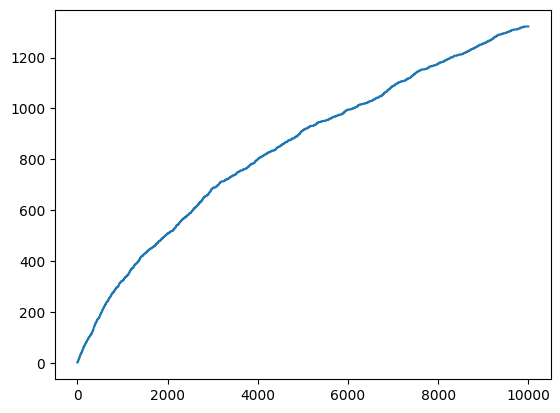

In [5]:
plt.plot(range(horizon), np.cumsum(cumRegret) )

In [ ]:
plt.plot(range(horizon), np.cumsum(cumRegret) )

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from skimage.measure import block_reduce

class Network_exploitation(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size=100):
        super(Network_exploitation, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size)
        self.activate = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        return self.fc2(self.activate(self.fc1(x)))
    
    
class Network_exploration(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size=100):
        super(Network_exploration, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_size)
        self.activate = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        return self.fc2(self.activate(self.fc1(x)))

def EE_forward(net1, net2, x):

    x.requires_grad = True
    f1 = net1(x)
    net1.zero_grad()
    f1.sum().backward(retain_graph=True)
    dc = torch.cat([p.grad.flatten().detach() for p in net1.parameters()])
    #dc = dc / torch.linalg.norm(dc)
    dc = block_reduce(dc.cpu(), block_size=51, func=np.mean)
    dc = torch.from_numpy(dc).to(x.device)
    # print('dc shape', dc.shape)
    f2 = net2(dc)
    return f1, f2, dc

game = games.game_case1( {} )

m = 100
d =  784

x = torch.ones((1,d)).to('cuda:0')

input_dim = d
output_dim = 2
net1 = Network_exploitation(input_dim, output_dim, m).to('cuda:0')

input_dim = 1544 #1660
output_dim = 2
net2 = Network_exploration(input_dim, output_dim, m).to('cuda:0')


f1, f2, dc  = EE_forward(net1, net2, x)
print(f1.shape)
print(f2.shape)
print(dc.shape)


In [39]:




game = games.game_case1( {} )

m = 100
d =  784

x = torch.ones( (1,28,28) ).float().to('cuda:0')

input_dim = d
output_dim = 10
net1 = Network_exploitation(output_dim,).to('cuda:0')


pred, latent = net1(x)
input_dim = 1330#1317 #1660
output_dim = 10
net2 = Network_exploration(input_dim, output_dim, m).to('cuda:0')

f1, f2, dc  = EE_forward(net1, net2, x)
print(f1.shape)
print(f2.shape)
print(dc.shape)


dc (1210,)
torch.Size([1, 10])
torch.Size([10])
torch.Size([1, 1330])


In [ ]:
# game.informative_symbols = [0, 1]

# def convert_pred_format(pred):
#     print('pred', pred)
#     final = []
#     for k in range(game.N):
#         print('k', k)
#         per_action = []
#         for s in np.unique(game.FeedbackMatrix[k]):
#             print('s', s)
#             if s in game.informative_symbols:
#                 per_action.append( pred[0][s].detach().cpu() )
#             else:
#                 per_action.append( 1 )
#         final.append( np.array(per_action) )
#     return final

# def convert_conf_format(conf, ):
#     final = []
#     for k in range(game.N):
#         per_action = []
#         for s in np.unique(game.FeedbackMatrix[k]):
#             if s in game.informative_symbols:
#                 per_action.append( conf[s].detach().cpu()  )
#             else:
#                 per_action.append( 0 )
#         final.append( np.array([max(per_action)]) )
#     return final

# pr = convert_pred_format(f1)
# print(pr)
# pr = convert_conf_format(f2)
# print(pr)

In [ ]:
# Define the range of x and y values for the grid
x_min, x_max = -1, 1
y_min, y_max = -1, 1

# Generate a grid of points
num_points = 1000
x_values = np.linspace(x_min, x_max, num_points)  
y_values = np.linspace(y_min, y_max, num_points)  
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Compute the decision boundary for the grid of points
b = 0.15

plt.figure(figsize=(4, 4))

decision_boundary_grid = context_generator.decision_boundary_function(x_grid, y_grid, b)
plt.contourf(x_grid, y_grid, decision_boundary_grid, levels=1, alpha=0.6, cmap=plt.cm.coolwarm)

contexts = np.array( [ context_generator.denormalize(i[4]) for i in train_hist ] ).squeeze(1) 

action0 = [ i[0] if i[0]==2 else np.nan for i in train_hist ]
indices_action0 = np.where(~np.isnan(action0))[0]
contexts0 = contexts[indices_action0]

action1 = [ i[0] if i[0]==1 else np.nan for i in train_hist ]
indices_action1 = np.where(~np.isnan(action1))[0]
contexts1 = contexts[indices_action1]

action2 = [ i[0] if i[0]==0 else np.nan for i in train_hist ]
indices_action2 = np.where(~np.isnan(action2))[0]
contexts2 = contexts[indices_action2]

# plt.plot(contexts0[:,0], contexts0[:,1], '.', color = 'orange', markersize = 2, label = 'predicted as class 1')
# plt.plot(contexts1[:,0], contexts1[:,1], '.', color = 'blue', markersize = 2, label = 'predicted as class 2')
plt.plot(contexts2[:,0], contexts2[:,1], '.', color = 'green', markersize = 2, label = 'explored')

plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.ylim((-1,1))
plt.xlim((-1,1))
# plt.title('Training decision boundary (shift = {})'.format(b))
plt.title('Deployment decision boundary (shift = {})'.format(b))
plt.legend(loc = (-0.4,-0.25),ncol = 3)
# Save the figure to a file with tight layout and 380 DPI
# plt.savefig('./figures/CBP_DB_{}.png'.format(b), dpi=380, bbox_inches='tight')
plt.savefig('./figures/ETC_exploration3_{}.png'.format(b), dpi=380, bbox_inches='tight')
# plt.savefig('./figures/CBP_exploration3_{}.png'.format(b), dpi=380, bbox_inches='tight')

In [ ]:
# Define the range of x and y values for the grid
x_min, x_max = -1, 1
y_min, y_max = -1, 1

# Generate a grid of points
num_points = 1000
x_values = np.linspace(x_min, x_max, num_points)  
y_values = np.linspace(y_min, y_max, num_points)  
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Compute the decision boundary for the grid of points
for b in [0.15]: #[0, 0.15]

    plt.figure(figsize=(4, 4))

    decision_boundary_grid = context_generator.decision_boundary_function(x_grid, y_grid, b)

    plt.contourf(x_grid, y_grid, decision_boundary_grid, levels=1, alpha=0.6, cmap=plt.cm.coolwarm)

    contexts = np.array( [ context_generator.denormalize(i[4]) for i in depl_hist ] ).squeeze(1) 

    action0 = [ i[0] if i[0]==2 else np.nan for i in depl_hist ]
    indices_action0 = np.where(~np.isnan(action0))[0]
    contexts0 = contexts[indices_action0]
    action1 = [ i[0] if i[0]==1 else np.nan for i in depl_hist ]
    indices_action1 = np.where(~np.isnan(action1))[0]
    contexts1 = contexts[indices_action1]

    plt.plot(contexts0[:,0], contexts0[:,1], '.', markersize = 1, color = 'red')
    plt.plot(contexts1[:,0], contexts1[:,1], '.', markersize = 1, color = 'blue')

    # plt.scatter(contexts[indices_predaction0][:,0], contexts[indices_predaction0][:,1], s = 1, color='blue', label='Predicted Points')
    # plt.scatter(contexts[indices_predaction1][:,0], contexts[indices_predaction1][:,1], s = 1, color='red', label='Predicted Points')

    # Add labels and title to the plot
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.title(' Decision Boundary')
    # Adjust the layout for better spacing
    plt.tight_layout()
    plt.ylim((-1,1))
    plt.xlim((-1,1))
    plt.title('Deployment decision boundary (shift = {})'.format(b))

    # Save the figure to a file with tight layout and 380 DPI
    plt.savefig('./figures/ETC_exploitation3_{}.png'.format(b), dpi=380, bbox_inches='tight')
    # plt.savefig('./figures/CBP_exploitation3_{}.png'.format(b), dpi=380, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.plot(np.cumsum(cumRegret))
# plt.ylim((0,3000))
# plt.savefig('./figures/ETC_regret3.png', dpi=380, bbox_inches='tight')
# plt.savefig('./figures/CBP_regret3.png', dpi=380, bbox_inches='tight')

In [ ]:
from matplotlib.ticker import ScalarFormatter

new_global_loss = np.hstack( [ i for i in global_loss if len(i)>0 ] )

plt.figure(figsize=(8, 4))
# plt.ylim( (0, 10) )
plt.yscale('log')
plt.grid(color='gray', linestyle='-')
plt.xlim( (-10, len(new_global_loss)) )


def generate_custom_ticks(start, horizon, end, increment, label_increment):
    custom_ticks = list(range(start, end+1 , increment))
    custom_tick_labels = [ str(i) for i in range(start, horizon , label_increment)]
    return custom_ticks, custom_tick_labels

# Define the parameters
start_value = 0
end_value = len(new_global_loss) 
tick_increment = 1000
label_increment = 50
horizon = 1000

# custom_ticks, custom_tick_labels = generate_custom_ticks(start_value, horizon, end_value, tick_increment, label_increment)

# plt.xticks(custom_ticks, custom_tick_labels, rotation=45, fontsize=7)

# Set tick locations and labels for the y-axis
tick_locations = [0.01, 0.1, 1, 10,]  # Define your desired tick locations
tick_labels = ['0.01', '0.1', '1', '10', ]  # Corresponding labels
ax = plt.gca()
ax.yaxis.set_major_locator(plt.FixedLocator(tick_locations))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels(tick_labels)

plt.plot( new_global_loss )
plt.xlabel('Step + 1000 epochs')
plt.ylabel('Loss')

# plt.savefig('./figures/loss_evolution.png', dpi=380, bbox_inches='tight')


In [ ]:
from matplotlib.ticker import ScalarFormatter

new_global_loss = np.vstack( [ i for i in global_losses if len(i)>0 ] )

plt.figure(figsize=(8, 4))

plt.yscale('log')
plt.grid(color='gray', linestyle='-')
plt.xlim( (-10, 19000) )

plt.xticks(custom_ticks, custom_tick_labels, rotation=45)

# Set tick locations and labels for the y-axis
tick_locations = [0.01, 0.1, 1, 10,]  # Define your desired tick locations
tick_labels = ['0.01', '0.1', '1', '10', ]  # Corresponding labels
ax = plt.gca()
ax.yaxis.set_major_locator(plt.FixedLocator(tick_locations))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_yticklabels(tick_labels)

plt.plot( new_global_loss[:,0], label = 'symbole 0' )
plt.plot( new_global_loss[:,1], label = 'symbole 1' )
plt.plot( new_global_loss[:,2], label = 'symbole 2' )
plt.plot( new_global_loss[:,3], label = 'symbole 3' )

plt.xlabel('Step + 1000 epochs')
plt.ylabel('Loss')
plt.legend()

# plt.savefig('./figures/loss_evolution_{}.png'.format(idx), dpi=380, bbox_inches='tight')


In [ ]:


def obtain_probability(t , factor):

    K = 100
    # sigma = K/(t+1)**(1/2)
    sigma = K/np.log(t+1)
    epsilon = 10e-7

    def divide_interval(start, end, k):
        intervals = np.linspace(start, end, k).tolist()
        return intervals

    # U = np.sqrt( self.alpha  * np.log(t) ) 

    U =  factor
    rhos = divide_interval(0, U, K)
    p_m_hat =  np.array([ np.exp( -rhos[i]**2 / ( 2*(sigma**2) )  )  for i in range(len(rhos)-1) ] )
    p_m = ( (1 - epsilon) * p_m_hat ) / p_m_hat.sum()
    p_m = p_m.tolist()
    p_m.append(epsilon)
        
    Z = np.random.choice(rhos, p= p_m)
    return Z

deterministic = []
rand = []

for t in range(1, 10000):
    sigma_i = 2
    d = 730
    N = 3
    H = 1
    lbd_reg = 1
    factor = sigma_i * (  np.sqrt( 2 * ( d  * np.log( 1 + t * np.log(N * H)/lbd_reg ) +  np.log(1/t**2) ) ) + np.sqrt(lbd_reg) * sigma_i )
    rand_value = obtain_probability(t , factor)
    deterministic.append(factor)
    rand.append(rand_value)


plt.plot(range(1,10000), deterministic, '.', markersize = 1)

plt.plot(range(1,10000), rand, '.', markersize = 1)

plt.savefig('vara2k100.png')

In [ ]:
plt.hist(rand, bins = 10)

In [ ]:
context_generator = synthetic_data.QuinticContexts(  )
context_generator.set_b(0)
context_generator.normalization()

V_it_inv = np.identity(20)

vals = []
rates = []

T = 10000

for t in range(1,T):

    norm_context, distribution = context_generator.get_context(True)
    dist_test.append(distribution)
    outcome = np.random.choice( 2 , p = distribution ) 

    latent_X = alg.func( torch.from_numpy( norm_context ).float().to(alg.device) ).cpu().detach().numpy()

    V_it_inv = V_it_inv - ( V_it_inv @ latent_X.T @ latent_X @ V_it_inv ) / ( 1 + latent_X @ V_it_inv @ latent_X.T ) 

    val =  latent_X @ V_it_inv @ latent_X.T  
    rate = t**(2/3)  * ( 1.01 * np.log(t) )**(1/3)

    vals.append(val[0][0])
    rates.append(1/rate)

plt.plot(range(1,T), vals, '.' , markersize = 0.01, color = 'blue', label = 'pseudo-count')
plt.plot(range(1,T), rates, '.', markersize = 0.01, color = 'red', label = 'exploration threshold')
plt.yscale('log')
plt.legend()